In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score

In [4]:
train_df=pd.read_csv('fashion-mnist_train.csv')
test_df=pd.read_csv('fashion-mnist_test.csv')

In [5]:
print(train_df.shape)
print(test_df.shape)

(60000, 785)
(10000, 785)


In [6]:
train_df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [7]:
test_df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


In [8]:
print(type(train_df))
print(type(test_df))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [9]:
train = np.array(train_df, dtype='float')
test = np.array(test_df, dtype='float')

In [11]:
print(type(train))
print(type(test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [12]:
X_train=train[:, 1:]
y_train = train[:, 0]

In [15]:
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [53]:
X_test = test[:,1:]
y_test = test[:, 0]

In [54]:
print(X_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)


In [55]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [56]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [57]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [58]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Dropout(0.5))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(64, (3, 3), strides=1, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 dropout_16 (Dropout)        (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 dropout_17 (Dropout)        (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                 

In [59]:
history = model.fit(X_train, y_train, batch_size=512, epochs=20, verbose=1)

Epoch 1/20
118/118 [==============================] - 42s 349ms/step - loss: 3.9912 - accuracy: 0.5071
Epoch 2/20
118/118 [==============================] - 41s 344ms/step - loss: 0.9232 - accuracy: 0.6848
Epoch 3/20
118/118 [==============================] - 41s 350ms/step - loss: 0.7409 - accuracy: 0.7336
Epoch 4/20
118/118 [==============================] - 41s 347ms/step - loss: 0.6571 - accuracy: 0.7619
Epoch 5/20
118/118 [==============================] - 41s 344ms/step - loss: 0.6080 - accuracy: 0.7790
Epoch 6/20
118/118 [==============================] - 40s 342ms/step - loss: 0.5743 - accuracy: 0.7913
Epoch 7/20
118/118 [==============================] - 41s 345ms/step - loss: 0.5461 - accuracy: 0.8021
Epoch 8/20
118/118 [==============================] - 40s 340ms/step - loss: 0.5253 - accuracy: 0.8087
Epoch 9/20
118/118 [==============================] - 40s 339ms/step - loss: 0.5108 - accuracy: 0.8138
Epoch 10/20
118/118 [==============================] - 40s 339ms/step - l

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

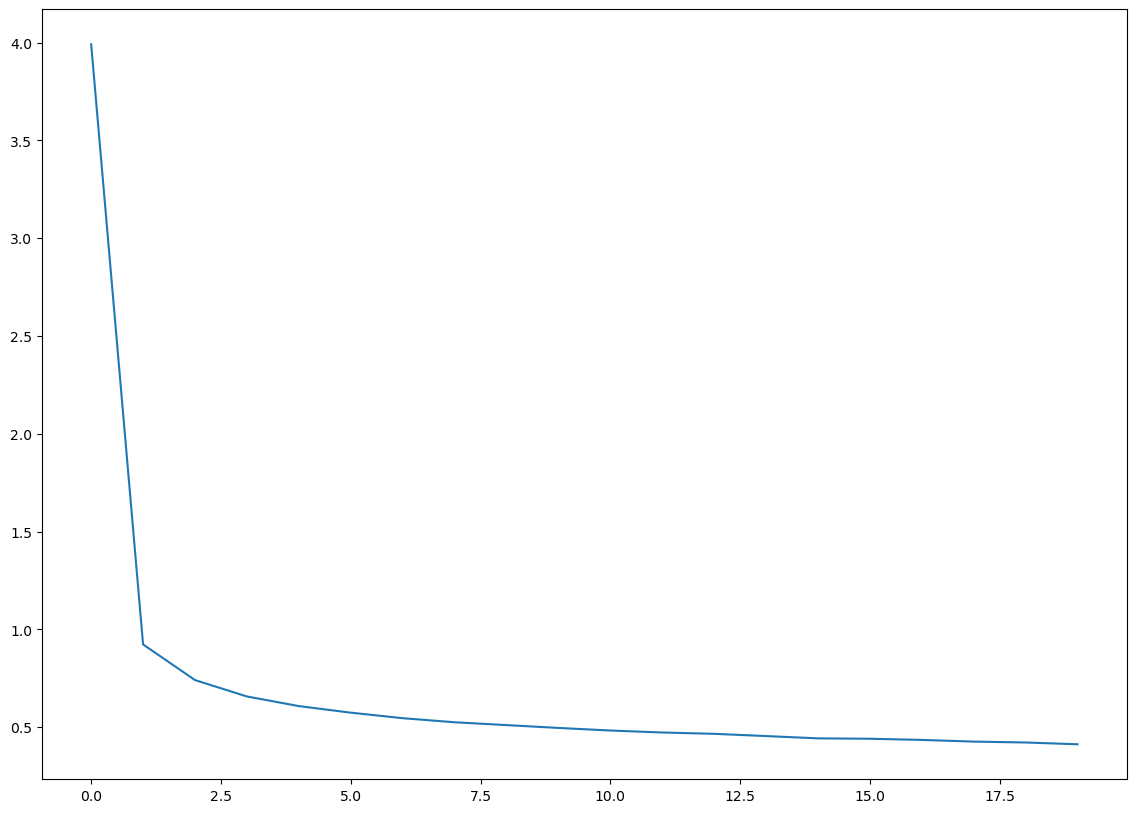

In [60]:
plt.plot(history.history['loss'])
plt.show()

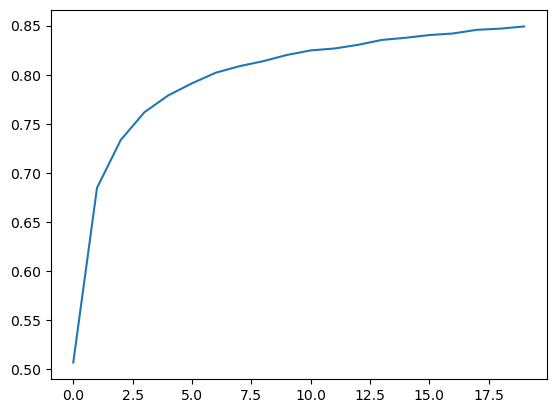

In [61]:
plt.plot(history.history['accuracy'])
plt.show()

In [62]:
X_pred = model.predict(X_test)

In [63]:
pre_class=np.argmax(X_pred, axis=1)

In [64]:
pre_class[2]

2

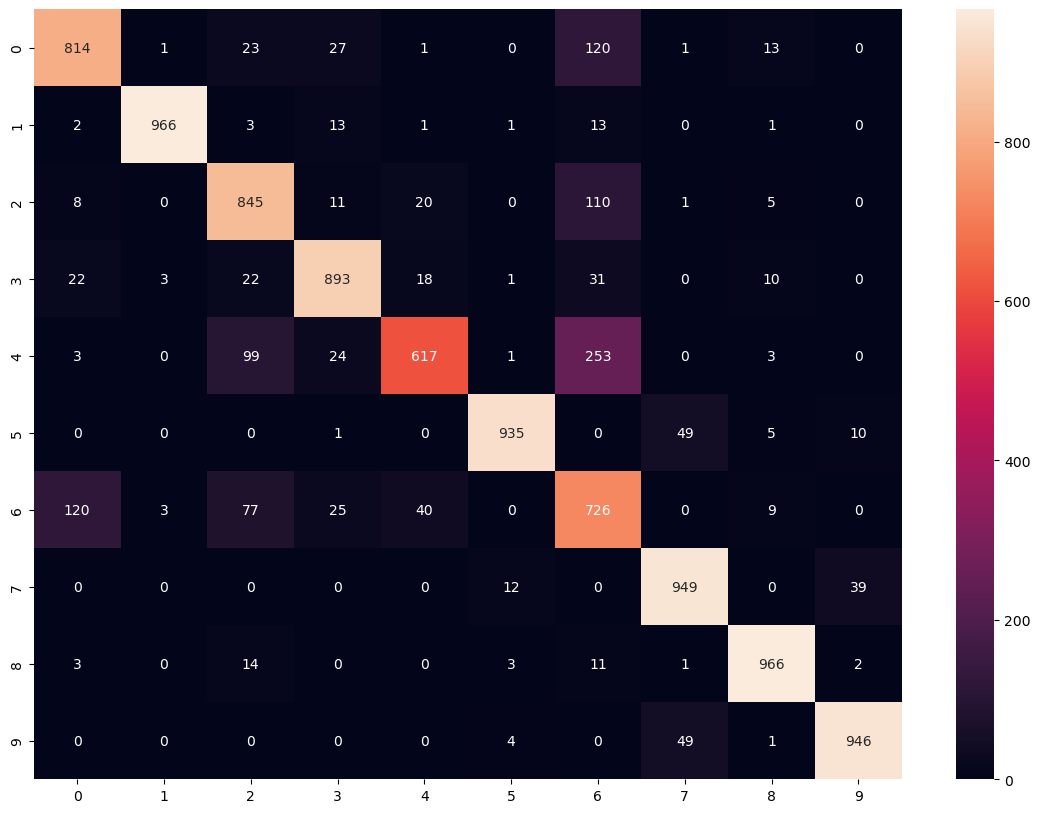

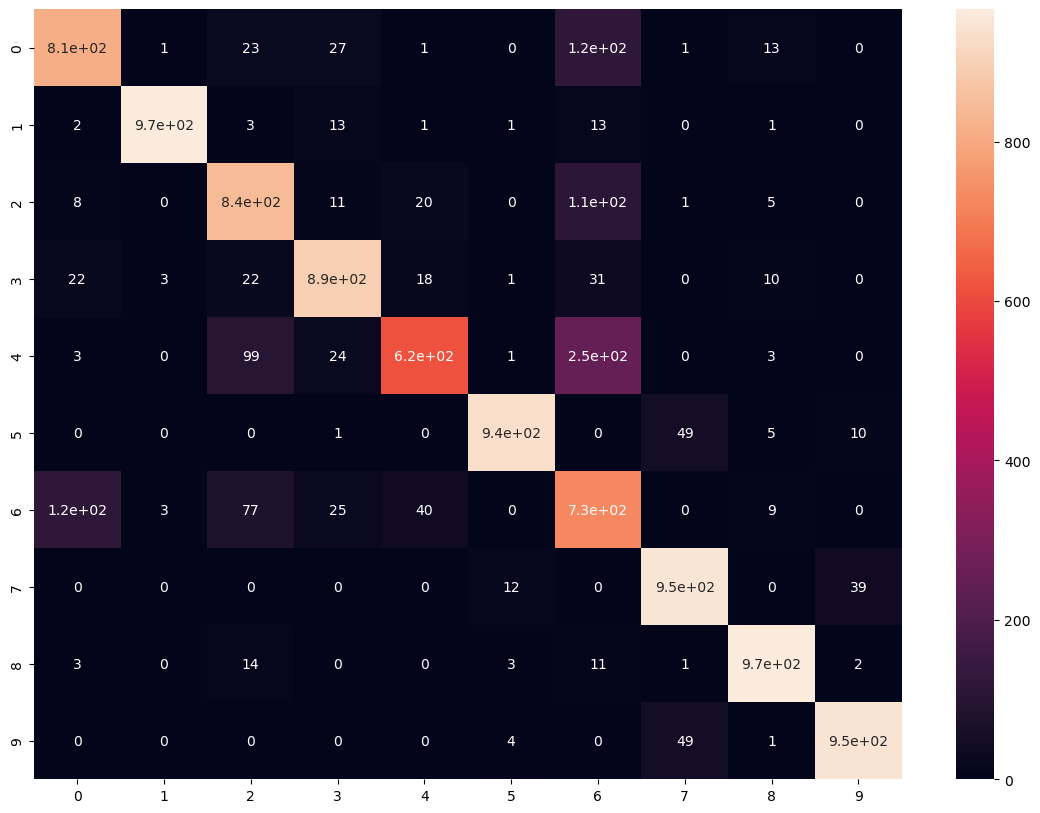

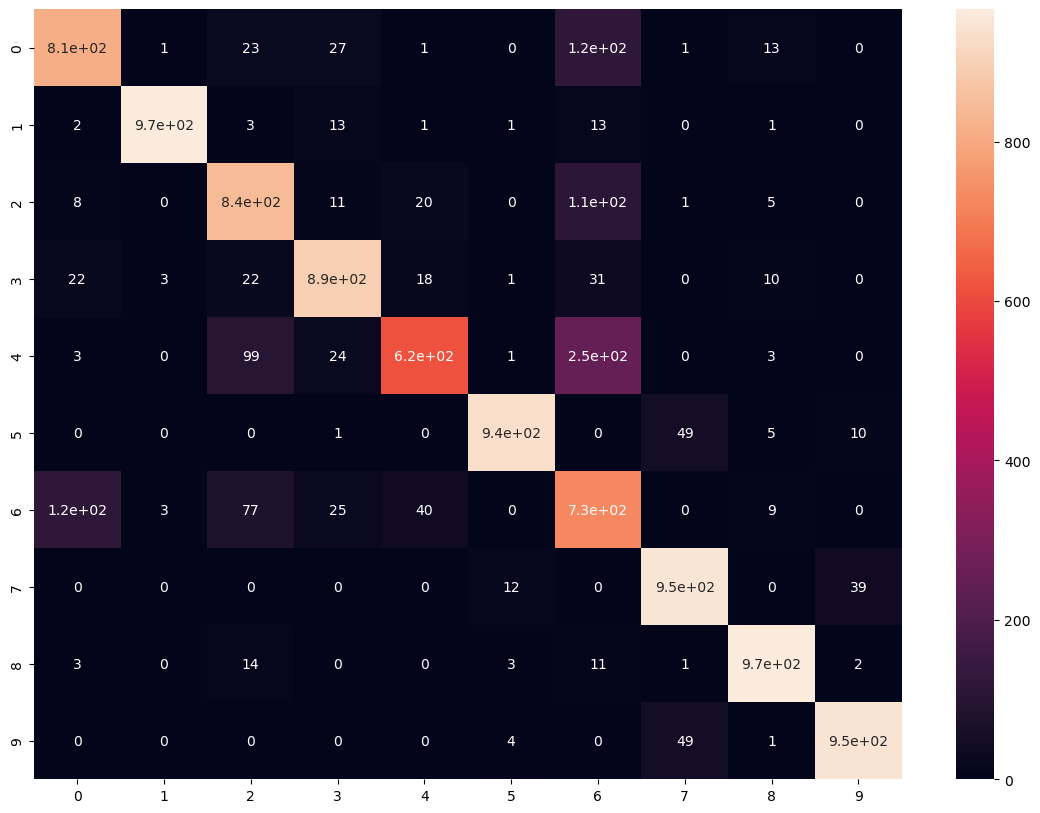

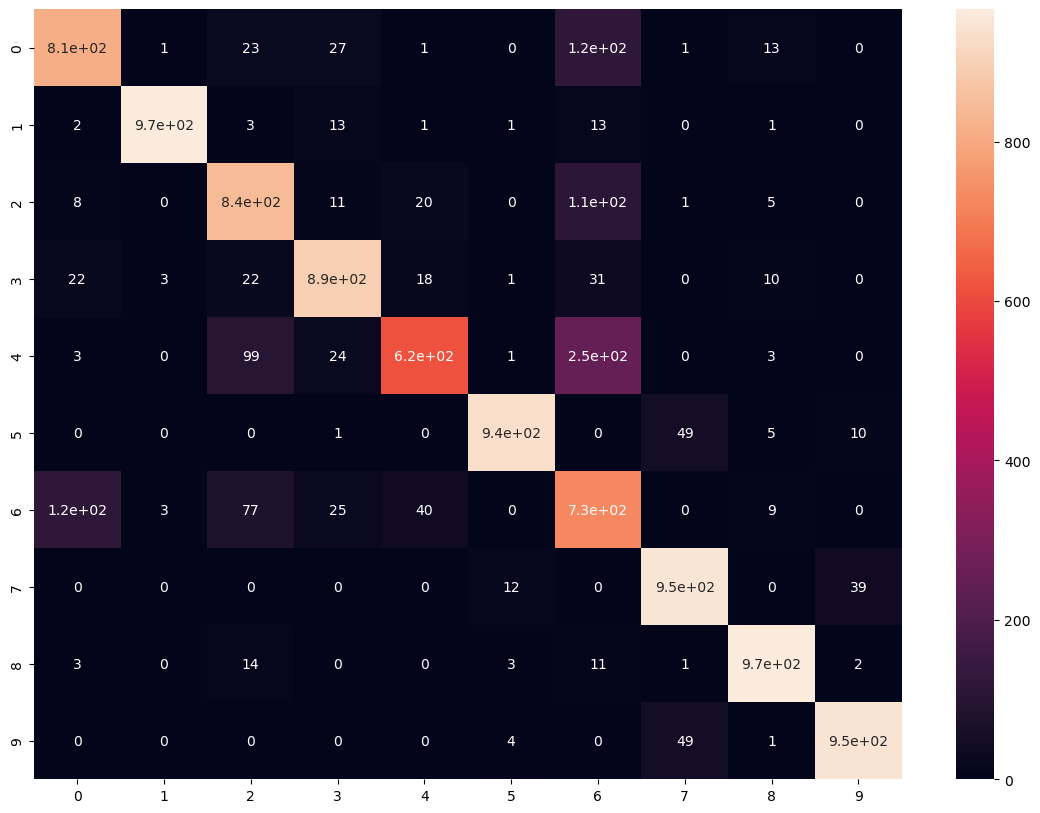

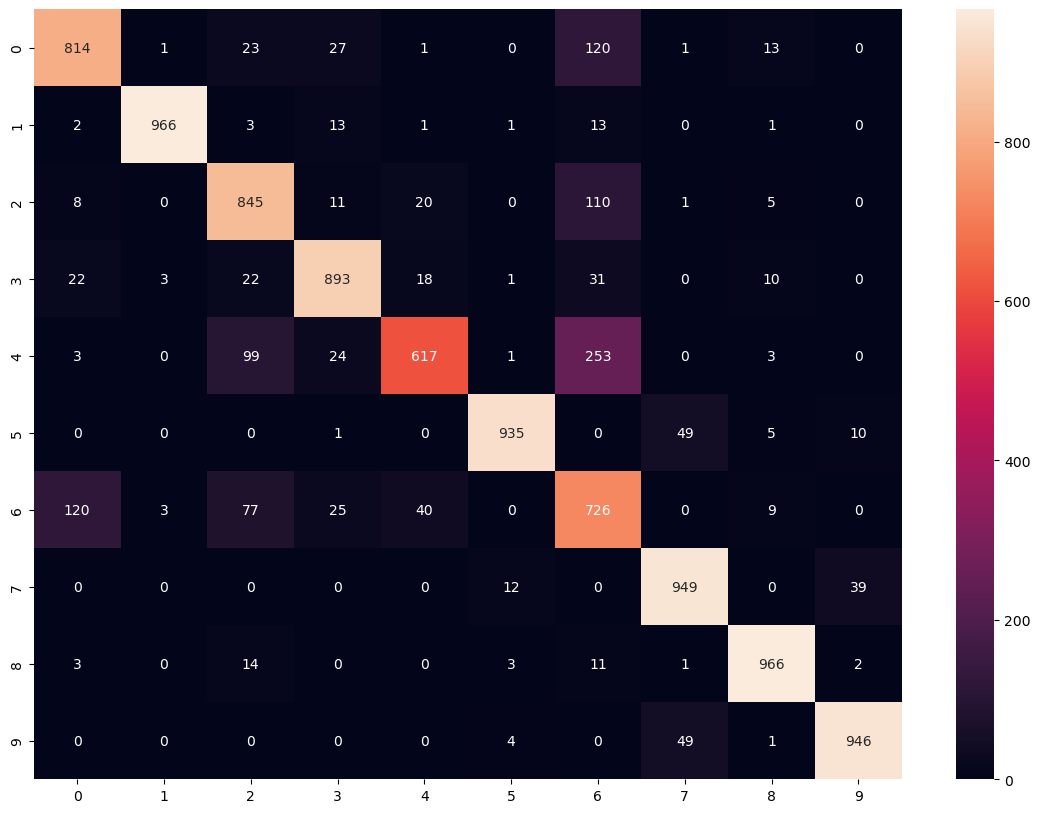

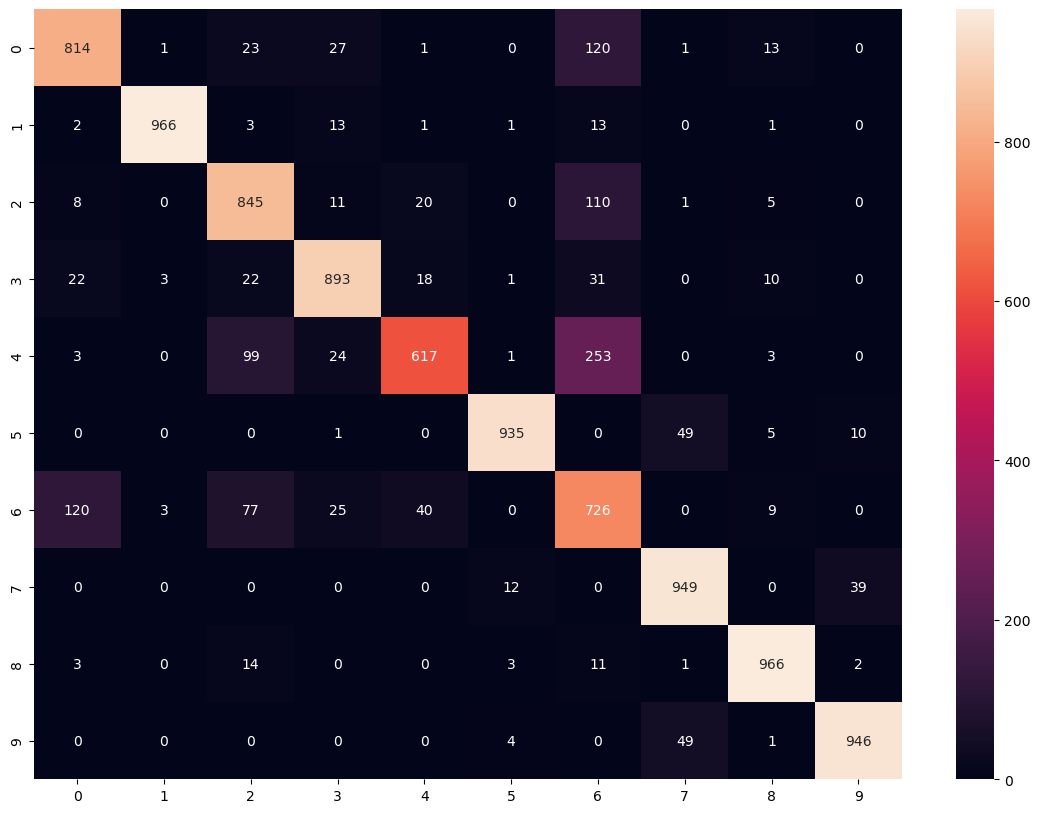

In [77]:
plt.figure(figsize=(14, 10))
sns.heatmap(confusion_matrix(y_test, pre_class), annot=True, fmt='d')
plt.show()

In [66]:
print(classification_report(y_test, pre_class)) 

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.83      1000
         1.0       0.99      0.97      0.98      1000
         2.0       0.78      0.84      0.81      1000
         3.0       0.90      0.89      0.90      1000
         4.0       0.89      0.62      0.73      1000
         5.0       0.98      0.94      0.96      1000
         6.0       0.57      0.73      0.64      1000
         7.0       0.90      0.95      0.93      1000
         8.0       0.95      0.97      0.96      1000
         9.0       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000

